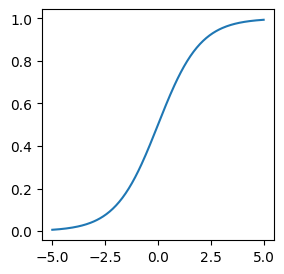

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1+np.exp(-z))
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,sigmoid(z))
plt.show()

In [2]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50,activation='relu',
                              kernel_initializer='he_normal')

In [3]:
he_avg_int = tf.keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                                   distribution='uniform')
dense = tf.keras.layers.Dense(50,activation='sigmoid',
                              kernel_initializer=he_avg_int)

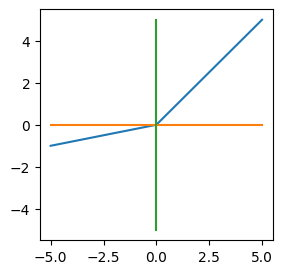

In [4]:
def leaky_relu(z,alpha):
    return np.maximum(alpha * z,z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,leaky_relu(z,0.2))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

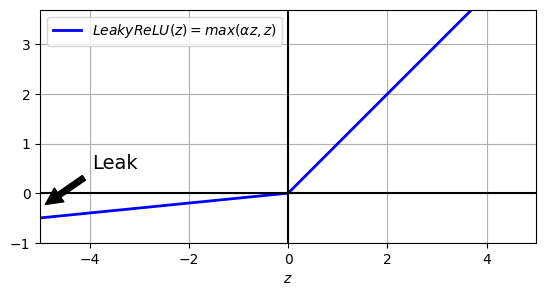

In [5]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [6]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) #default alpha = 0.3
dense = tf.keras.layers.Dense(50,activation=leaky_relu,
                              kernel_initializer='he_normal')

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

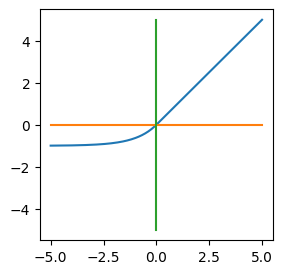

In [8]:
def elu(z,alpha=1):
    return np.where(z<0,alpha * (np.exp(z)-1),z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,elu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

In [9]:
dense = tf.keras.layers.Dense(50,activation='elu',kernel_initializer='he_normal')

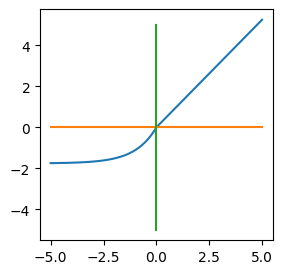

In [10]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)
def selu(z,scale=scale_0_1,alpha=alpha_0_1):
    return scale * elu(z,alpha)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,selu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

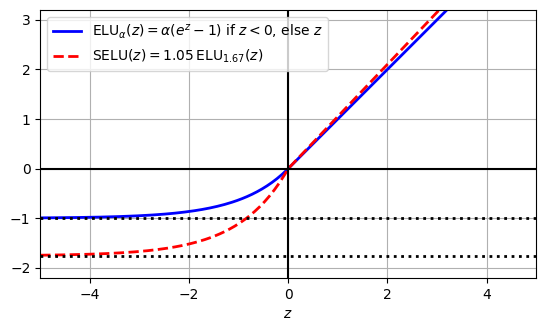

In [11]:
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [12]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation='selu',
                                    kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,10

 Total params: 1,079,410 (4.12 MB)

 Trainable params: 1,079,410 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
pixel_means = X_train.mean(axis=0,keepdims=True)
pixel_stds = X_train.std(axis=0,keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.5811 - loss: 1.1155 - val_accuracy: 0.7426 - val_loss: 0.7229
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7657 - loss: 0.6594 - val_accuracy: 0.7930 - val_loss: 0.5919
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8073 - loss: 0.5594 - val_accuracy: 0.8138 - val_loss: 0.5327
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8251 - loss: 0.5086 - val_accuracy: 0.8198 - val_loss: 0.5179
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8314 - loss: 0.4910 - val_accuracy: 0.8228 - val_loss: 0.5028


In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.2513 - loss: 1.9577 - val_accuracy: 0.3688 - val_loss: 1.6463
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3899 - loss: 1.5361 - val_accuracy: 0.5550 - val_loss: 1.1486
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5727 - loss: 1.0666 - val_accuracy: 0.6146 - val_loss: 0.9825
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6132 - loss: 0.9737 - val_accuracy: 0.5986 - val_loss: 0.9662
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6726 - loss: 0.8241 - val_accuracy: 0.7092 - val_loss: 0.7155


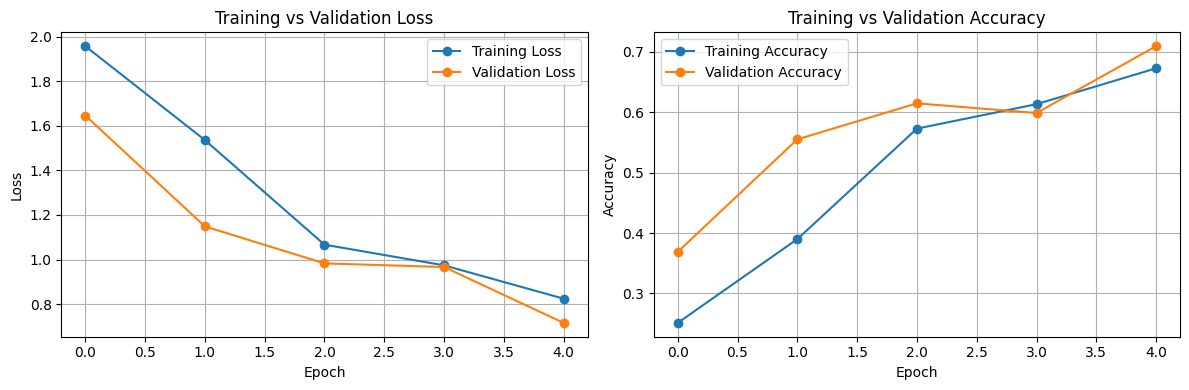

In [23]:
# Plot Training vs Validation Loss
plt.figure(figsize=(12, 4))

# ---- LOSS ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- ACCURACY ----
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

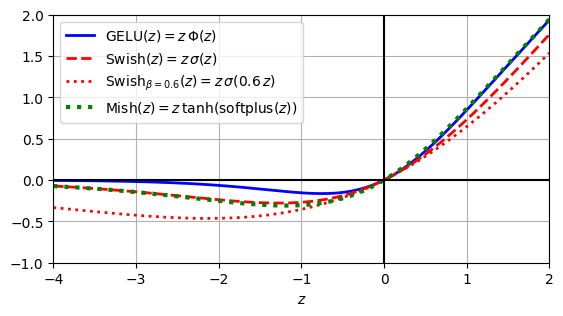

In [24]:
def swish(z,beta=1):
    return z * sigmoid(beta*z)
def approx_gelu(z):
    return swish(z,beta=1.702)
def softplus(z):
    return np.log(1+np.exp(z))
def mish(z):
    return z * np.tanh(softplus(z))
z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [28]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8120 - loss: 0.5465 - val_accuracy: 0.8546 - val_loss: 0.3994
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8634 - loss: 0.3928 - val_accuracy: 0.8666 - val_loss: 0.3653


In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7970 - loss: 0.6062 - val_accuracy: 0.8472 - val_loss: 0.4257
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8523 - loss: 0.4212 - val_accuracy: 0.8608 - val_loss: 0.3871


In [33]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [34]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [35]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8709 - loss: 0.3692 - val_accuracy: 0.8688 - val_loss: 0.3655
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8789 - loss: 0.3457 - val_accuracy: 0.8732 - val_loss: 0.3566


In [36]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B) = split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B) = split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B) = split_dataset(X_test,y_test)

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8,activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model.fit(X_train_A,y_train_A,epochs=20,
                    validation_data=(X_valid_A,y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8025 - loss: 0.6050 - val_accuracy: 0.9022 - val_loss: 0.2845
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9052 - loss: 0.2747 - val_accuracy: 0.9123 - val_loss: 0.2521
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9178 - loss: 0.2373 - val_accuracy: 0.9170 - val_loss: 0.2393
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9260 - loss: 0.2146 - val_accuracy: 0.9213 - val_loss: 0.2311
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9324 - loss: 0.1976 - val_accuracy: 0.9240 - val_loss: 0.2261
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9375 - loss: 0.1838 - val_accuracy: 0.9260 - val_loss: 0.2224
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9416 - loss: 0.1720 - val_accuracy: 0.9268 - val_loss: 0.2196
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9459 - loss: 0.1615 - 

In [37]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model_B.fit(X_train_B,y_train_B,epochs=20,
                      validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9031 - loss: 0.3915 - val_accuracy: 0.9446 - val_loss: 0.2454
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9487 - loss: 0.2102 - val_accuracy: 0.9505 - val_loss: 0.1759
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9534 - loss: 0.1679 - val_accuracy: 0.9525 - val_loss: 0.1527
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1506 - val_accuracy: 0.9505 - val_loss: 0.1420
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9562 - loss: 0.1414 - val_accuracy: 0.9505 - val_loss: 0.1359
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1355 - val_accuracy: 0.9515 - val_loss: 0.1319
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9583 - loss: 0.1314 - val_accuracy: 0.9525 - val_loss: 0.1291
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9594 - loss: 0.1283 - val_accuracy: 0.

[0.1155860424041748, 0.9620000123977661]

In [38]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [39]:
tf.random.set_seed(42)

In [40]:
model_A_clone =tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [41]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [42]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

In [43]:
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                           validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6757 - loss: 0.6297 - val_accuracy: 0.7428 - val_loss: 0.6052
Epoch 2/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7706 - loss: 0.6019 - val_accuracy: 0.8170 - val_loss: 0.5785
Epoch 3/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.5772 - val_accuracy: 0.8625 - val_loss: 0.5545
Epoch 4/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.5550 - val_accuracy: 0.8892 - val_loss: 0.5330
Epoch 1/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9289 - loss: 0.3526 - val_accuracy: 0.9505 - val_loss: 0.2347
Epoch 2/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9468 - loss: 0.2100 - val_accuracy: 0.9545 - val_loss: 0.1719
Epoch 3/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9510 - loss: 0.1713 - val_accuracy: 0.9545 - val_loss: 0.1498
Epoch 4/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9528 - loss: 0.1552 - val_accuracy: 0.9525

In [44]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9565 - loss: 0.1288


[0.1287778615951538, 0.9564999938011169]

In [45]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(100,activation='relu',
                              kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid,y_valid))

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [47]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5751 - loss: 1.3316 - val_accuracy: 0.7136 - val_loss: 0.8704
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7405 - loss: 0.7730 - val_accuracy: 0.7662 - val_loss: 0.6869
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7801 - loss: 0.6547 - val_accuracy: 0.7924 - val_loss: 0.6095
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7999 - loss: 0.5931 - val_accuracy: 0.8076 - val_loss: 0.5643
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8106 - loss: 0.5541 - val_accuracy: 0.8182 - val_loss: 0.5343
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8187 - loss: 0.5265 - val_accuracy: 0.8250 - val_loss: 0.5123
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8241 - loss: 0.5058 - val_accuracy: 0.8260 - val_loss: 0.4957
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8295 - loss: 0.4895 - 

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [49]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7608 - loss: 0.7024 - val_accuracy: 0.8194 - val_loss: 0.5030
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8384 - loss: 0.4601 - val_accuracy: 0.8326 - val_loss: 0.4534
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8537 - loss: 0.4159 - val_accuracy: 0.8432 - val_loss: 0.4222
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8631 - loss: 0.3893 - val_accuracy: 0.8486 - val_loss: 0.4028
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8693 - loss: 0.3700 - val_accuracy: 0.8550 - val_loss: 0.3883
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.3543 - val_accuracy: 0.8564 - val_loss: 0.3826
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8781 - loss: 0.3412 - val_accuracy: 0.8564 - val_loss: 0.3771
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8816 - loss: 0.3302 - 

In [50]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [51]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7525 - loss: 0.7238 - val_accuracy: 0.8182 - val_loss: 0.5039
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8383 - loss: 0.4645 - val_accuracy: 0.8432 - val_loss: 0.4431
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8538 - loss: 0.4179 - val_accuracy: 0.8478 - val_loss: 0.4152
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8630 - loss: 0.3900 - val_accuracy: 0.8494 - val_loss: 0.3998
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8693 - loss: 0.3707 - val_accuracy: 0.8532 - val_loss: 0.3913
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8741 - loss: 0.3553 - val_accuracy: 0.8556 - val_loss: 0.3826
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8775 - loss: 0.3427 - val_accuracy: 0.8576 - val_loss: 0.3771
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8813 - loss: 0.3320 - 

In [52]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [53]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6547 - loss: 1.0791 - val_accuracy: 0.7670 - val_loss: 0.7085
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7791 - loss: 0.6612 - val_accuracy: 0.7958 - val_loss: 0.5987
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8038 - loss: 0.5852 - val_accuracy: 0.8090 - val_loss: 0.5491
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8159 - loss: 0.5453 - val_accuracy: 0.8206 - val_loss: 0.5201
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8236 - loss: 0.5199 - val_accuracy: 0.8264 - val_loss: 0.5005
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8287 - loss: 0.5018 - val_accuracy: 0.8322 - val_loss: 0.4862
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8326 - loss: 0.4880 - val_accuracy: 0.8362 - val_loss: 0.4753
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8363 - loss: 0.4768 - 

In [54]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [55]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8144 - loss: 0.5141 - val_accuracy: 0.8488 - val_loss: 0.4048
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8592 - loss: 0.3886 - val_accuracy: 0.8560 - val_loss: 0.4120
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8710 - loss: 0.3636 - val_accuracy: 0.8544 - val_loss: 0.4218
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8758 - loss: 0.3515 - val_accuracy: 0.8548 - val_loss: 0.4516
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8794 - loss: 0.3451 - val_accuracy: 0.8636 - val_loss: 0.4112
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8820 - loss: 0.3431 - val_accuracy: 0.8630 - val_loss: 0.4608
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8835 - loss: 0.3419 - val_accuracy: 0.8486 - val_loss: 0.5526
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8841 - loss: 0.3418 - 

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [57]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8189 - loss: 0.5065 - val_accuracy: 0.8230 - val_loss: 0.4342
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8619 - loss: 0.3774 - val_accuracy: 0.8278 - val_loss: 0.4226
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8752 - loss: 0.3384 - val_accuracy: 0.8212 - val_loss: 0.4680
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8834 - loss: 0.3148 - val_accuracy: 0.8530 - val_loss: 0.3861
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8898 - loss: 0.2963 - val_accuracy: 0.8560 - val_loss: 0.3864
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8947 - loss: 0.2789 - val_accuracy: 0.8520 - val_loss: 0.4231
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8989 - loss: 0.2680 - val_accuracy: 0.8694 - val_loss: 0.3617
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9032 - loss: 0.2561 - 

In [58]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,
                                       beta_2=0.999)

In [59]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8130 - loss: 0.5411 - val_accuracy: 0.8334 - val_loss: 0.4552
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8584 - loss: 0.4013 - val_accuracy: 0.8440 - val_loss: 0.4127
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8720 - loss: 0.3599 - val_accuracy: 0.8582 - val_loss: 0.3788
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8807 - loss: 0.3332 - val_accuracy: 0.8592 - val_loss: 0.3730
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8875 - loss: 0.3140 - val_accuracy: 0.8654 - val_loss: 0.3686
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8923 - loss: 0.2982 - val_accuracy: 0.8664 - val_loss: 0.3648
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8975 - loss: 0.2849 - val_accuracy: 0.8676 - val_loss: 0.3677
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9007 - loss: 0.2746 -

In [60]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [61]:
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8279 - loss: 0.4844 - val_accuracy: 0.8452 - val_loss: 0.4089
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8668 - loss: 0.3654 - val_accuracy: 0.8540 - val_loss: 0.3779
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8786 - loss: 0.3292 - val_accuracy: 0.8602 - val_loss: 0.3611
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8872 - loss: 0.3050 - val_accuracy: 0.8668 - val_loss: 0.3420
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8939 - loss: 0.2879 - val_accuracy: 0.8686 - val_loss: 0.3458
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8993 - loss: 0.2695 - val_accuracy: 0.8672 - val_loss: 0.3565
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9034 - loss: 0.2589 - val_accuracy: 0.8724 - val_loss: 0.3419
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9073 - loss: 0.2481 - 

In [62]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5,learning_rate=0.001,
                                      beta_1=0.9,beta_2=0.999)

In [63]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8206 - loss: 0.5006 - val_accuracy: 0.8322 - val_loss: 0.4262
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.3759 - val_accuracy: 0.8340 - val_loss: 0.4158
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8757 - loss: 0.3379 - val_accuracy: 0.8506 - val_loss: 0.3900
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8838 - loss: 0.3134 - val_accuracy: 0.8704 - val_loss: 0.3549
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8913 - loss: 0.2940 - val_accuracy: 0.8666 - val_loss: 0.3671
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8955 - loss: 0.2788 - val_accuracy: 0.8670 - val_loss: 0.3666
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9003 - loss: 0.2661 - val_accuracy: 0.8772 - val_loss: 0.3601
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9042 - loss: 0.2565 - 

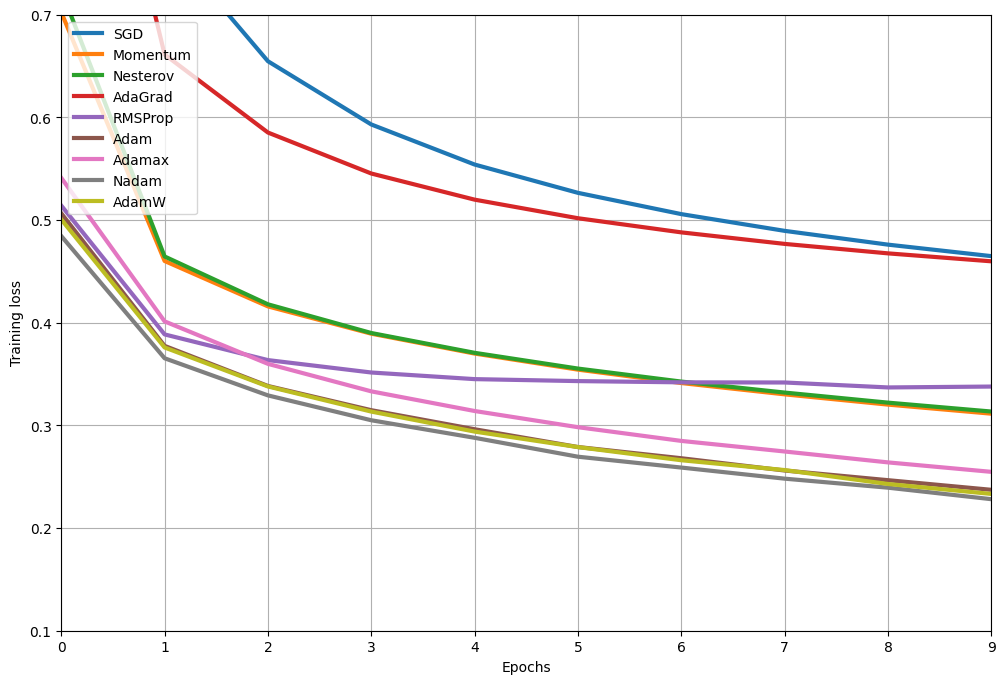

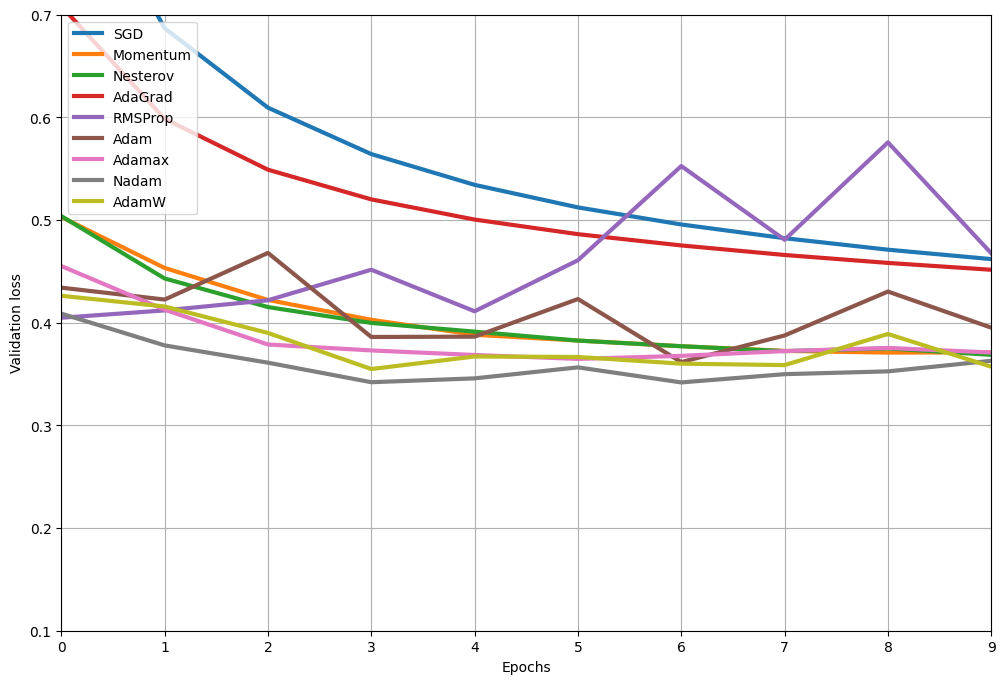

In [64]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()